In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier,\
GradientBoostingClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier\
,AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from collections import Counter
from sklearn.metrics import plot_roc_curve

In [3]:
train_data = pd.read_csv(r"dataset\Training Data.csv")
test_data = pd.read_csv(r"dataset\Test Data.csv")

 ## Making test data as train data

In [4]:
test_data['profession']=test_data['profession'].apply(lambda x:'Flight_attendant' if x=='Flight attendant' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Petroleum_Engineer' if x=='Petroleum Engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Chartered_Accountant' if x=='Chartered Accountant' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Web_designer' if x=='Web designer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Financial_Analyst' if x=='Financial Analyst' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Software_Developer' if x=='Software Developer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Graphic_Designer' if x=='Graphic Designer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Army_officer' if x=='Army officer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Civil_servant' if x=='Civil servant' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Chemical_engineer' if x=='Chemical engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Air_traffic_controller' if x=='Air traffic controller' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Civil_engineer' if x=='Civil engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Industrial_Engineer' if x=='Industrial Engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Hotel_Manager' if x=='Hotel Manager' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Mechanical_engineer' if x=='Mechanical engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Computer_operator' if x=='Computer operator' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Technical_writer' if x=='Technical writer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Technology_specialist' if x=='Technology specialist' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Biomedical_Engineer' if x=='Biomedical Engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Design_Engineer' if x=='Design Engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Computer_hardware_engineer' if x=='Computer hardware engineer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Fashion_Designer' if x=='Fashion Designer' else x )
test_data['profession']=test_data['profession'].apply(lambda x:'Police_officer' if x=='Police officer' else x )
#------------------------------------------------------------------------------------------------------------------------------

test_data['city']=test_data['city'].apply(lambda x:'Bihar_Sharif' if x=='Bihar Sharif' else x )
test_data['city']=test_data['city'].apply(lambda x:'Sri_Ganganagar' if x=='Sri Ganganagar' else x )
test_data['city']=test_data['city'].apply(lambda x:'Ghaziabad' if x=='Khora, Ghaziabad' else x )
test_data['city']=test_data['city'].apply(lambda x:'New_Delhi' if x=='New Delhi' else x )
test_data['city']=test_data['city'].apply(lambda x:'Kirari_Suleman_Nagar' if x=='Kirari Suleman Nagar' else x )
test_data['city']=test_data['city'].apply(lambda x:'Sultan_Pur_Majra' if x=='Sultan Pur Majra' else x )
test_data['city']=test_data['city'].apply(lambda x:'Rajpur_Sonarpur' if x=='Rajpur Sonarpur' else x )
test_data['city']=test_data['city'].apply(lambda x:'Nangloi_Jat' if x=='Nangloi Jat' else x )
test_data['city']=test_data['city'].apply(lambda x:'North_Dumdum' if x=='North Dumdum' else x )
test_data['city']=test_data['city'].apply(lambda x:'South_Dumdum' if x=='South Dumdum' else x )
test_data['city']=test_data['city'].apply(lambda x:'Navi_Mumbai' if x=='Navi Mumbai' else x )
test_data['city']=test_data['city'].apply(lambda x:'Raurkela_Industrial_Township' if x=='Raurkela Industrial Township' else x )
test_data['city']=test_data['city'].apply(lambda x:'Surendranagar_Dudhrej' if x=='Surendranagar Dudhrej' else x )
test_data['city']=test_data['city'].apply(lambda x:'Bhalswa_Jahangir_Pur' if x=='Bhalswa Jahangir Pur' else x )
test_data['city']=test_data['city'].apply(lambda x:'Karawal_Nagar' if x=='Karawal Nagar' else x )
test_data['city']=test_data['city'].apply(lambda x:'Sangli-Miraj_&_Kupwad' if x=='Sangli-Miraj & Kupwad' else x )
#----------------------------------------------------------------------------------------------------------------------------
test_data['state']=test_data['state'].apply(lambda x:'West_Bengal' if x=='West Bengal' else x )
test_data['state']=test_data['state'].apply(lambda x:'Tamil_Nadu' if x=='Tamil Nadu' else x )
test_data['state']=test_data['state'].apply(lambda x:'Andhra_Pradesh' if x=='Andhra Pradesh' else x )
test_data['state']=test_data['state'].apply(lambda x:'Madhya_Pradesh' if x=='Madhya Pradesh' else x )
test_data['state']=test_data['state'].apply(lambda x:'Uttar_Pradesh' if x=='Uttar Pradesh' else x )
test_data['state']=test_data['state'].apply(lambda x:'Uttar_Pradesh' if x=='Uttar Pradesh[5]' else x )
test_data['state']=test_data['state'].apply(lambda x:'Jammu_and_Kashmir' if x=='Jammu and Kashmir' else x )
test_data['state']=test_data['state'].apply(lambda x:'Himachal_Pradesh' if x=='Himachal Pradesh' else x )


## Categorical to Numerical

In [5]:
#training data
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
Encoders={}
for col in cat_col:
    Encoders['L_enc_'+str(col)]=LabelEncoder()
    train_data[col]=Encoders['L_enc_'+str(col)].fit_transform(train_data[col])

In [6]:
for col in cat_col:
    test_data[col]=Encoders['L_enc_'+str(col)].transform(test_data[col])


## X,y

In [7]:
xtrain=train_data.drop('risk_flag',axis=1)
ytrain=train_data["risk_flag"]

In [8]:
xtrain.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,1303835,23,3,1,2,0,33,251,13,3,13
1,2,7574516,40,10,1,2,0,43,227,14,9,13
2,3,3991815,66,4,0,2,0,47,8,12,4,10
3,4,6256451,41,2,1,2,1,43,54,17,2,12
4,5,5768871,47,11,1,2,0,11,296,22,3,14


## Visualization

In [9]:
#x_1,x_2=xtrain[ytrain==1], xtrain[ytrain==0]
#x_1= x_1[:].values
#x_2= x_2[:].values
#Scatter Plot of the data
#plt.scatter(list(zip(x_1))[0],list(zip(x_1))[1],color='#labc9c')
#plt.scatter(list(zip(x_2))[0],list(zip(x_2))[1],color='#e67e22')

#x_coords=list(zip(x_1))[0]+list(zip(x_2))[0]
#y_coords=list(zip(x_1))[1]+list(zip(x_2))[1]
#plt.axis([min(x_coords),max(x_coords),min(y_coords),max(y_coords)])

#plt.tilte('original Dataset')
#plt.show()



In [10]:
X_train, X_test, y_train, y_test = train_test_split(xtrain,ytrain,test_size=0.3,random_state=2021)
#XY_data = [X_train, X_test, y_train, y_test]

In [14]:
# Function to get optimal model using grid search CV (n_splits = 5, validation set = 0.175 of train set)
def RnCV(param,clf,XY_data):
    [X_train, X_test, Y_train, Y_test] = XY_data
    clf.fit(X_train,Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Default Training roc_auc_score = {}".format(roc_auc_score(Y_train,Y_train_pred)))
    print("Default Test roc_auc_score = {}".format(roc_auc_score(Y_test,Y_test_pred)))
    print("Default confusion matrix\n{}".format(confusion_matrix(Y_test,Y_test_pred)))
    cv_split = StratifiedKFold(n_splits = 5)
    best_model = RandomizedSearchCV(estimator = clf, param_distributions = param, cv = cv_split,\
                              scoring = 'roc_auc',n_jobs=-1)
    best_model.fit(X_train, Y_train)
    best_param = best_model.best_params_
    print("Best parameters are : {}".format(best_param))
    clf.set_params(**best_param)
    clf.fit(X_train, Y_train)
    Y_train_pred = clf.predict(X_train)
    Y_test_pred = clf.predict(X_test)
    print("Training roc_auc_score = {}".format(roc_auc_score(Y_train,Y_train_pred)))
    print("Test roc_auc_score = {}".format(roc_auc_score(Y_test,Y_test_pred)))
    print("confusion matrix\n{}".format(confusion_matrix(Y_test,Y_test_pred)))
    return clf

# Sampling techniques

## OverSampling


In [15]:
from imblearn.over_sampling import RandomOverSampler

In [16]:
os=RandomOverSampler(0.75)
X_train_os,y_train_os=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 154569, 1: 21831})
The number of classes after fit Counter({0: 154569, 1: 115926})


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [17]:
param = {
     'criterion': ['gini', 'entropy'],\
     'bootstrap': [False,True],\
     'oob_score': [True,False],\
     'min_samples_split' : range(2,11,2),\
     'min_samples_leaf' : range(1,10,2),\
     'max_features' : range(1,12,1),\
     'max_depth': [20,37],\
     'n_estimators': [200,500,100,50,1000],\
 #    'class_weight':[{0:1, 1:10},'balanced',None,{0:1,1:7}]\
}

In [18]:
XY_data = [X_train_os, X_test, y_train_os, y_test]

In [19]:
model_ET=ExtraTreesClassifier(class_weights={0:1,1:2})

In [20]:
clf=RnCV(param,model_ET,XY_data)

Default Training roc_auc_score = 1.0
Default Test roc_auc_score = 0.7000478545104631
Default confusion matrix
[[64129  2306]
 [ 5180  3985]]


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.99853265 0.98200302        nan 0.97908943        nan
        nan 0.97785145 0.98425342 0.97897677]
  warnings.warn(


Best parameters are : {'oob_score': False, 'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 11, 'max_depth': 37, 'criterion': 'entropy', 'bootstrap': True}
Training roc_auc_score = 0.9998975644864184
Test roc_auc_score = 0.7224338865610369
confusion matrix
[[65226  1209]
 [ 4921  4244]]


## UnderSamping Version_1

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
us1=RandomUnderSampler(0.5,random_state=1)
X_train_us1,y_train_us1=us1.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_us1)))

The number of classes before fit Counter({0: 154569, 1: 21831})
The number of classes after fit Counter({0: 43662, 1: 21831})


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [23]:
model_ET1=ExtraTreesClassifier()

In [24]:
XY_data1 = [X_train_us1, X_test, y_train_us1, y_test]

In [25]:
clf_us1=RnCV(param,model_ET1,XY_data1)

Default Training roc_auc_score = 1.0
Default Test roc_auc_score = 0.7909058692540867
Default confusion matrix
[[60283  6152]
 [ 2984  6181]]


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.91048078        nan 0.93116269        nan 0.92299598
 0.8800074  0.90740599        nan 0.92983145]
  warnings.warn(


Best parameters are : {'oob_score': True, 'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 2, 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Training roc_auc_score = 0.8407081672850534
Test roc_auc_score = 0.7727044031199909
confusion matrix
[[62714  3721]
 [ 3653  5512]]


## Undersampling Version_2

In [27]:
us1=RandomUnderSampler(0.5,random_state=1,version=2)
X_train_us2,y_train_us2=us2.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_us2)))

SyntaxError: positional argument follows keyword argument (<ipython-input-27-6c81281e3cba>, line 1)

In [ ]:
model_ET2=ExtraTreesClassifier()

In [ ]:
XY_data2 = [X_train_us2, X_test, y_train_us2, y_test]

In [ ]:
clf_us2=RnCV(param,model_ET2,XY_data2)

## SMOTETomek

In [26]:
from imblearn.combine import SMOTETomek

In [27]:
st=SMOTETomek(0.75)
X_train_st,y_train_st=st.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The number of classes before fit Counter({0: 154569, 1: 21831})
The number of classes after fit Counter({0: 139798, 1: 101155})


In [28]:
model_st=ExtraTreesClassifier()

In [29]:
XY_data_st = [X_train_st, X_test, y_train_st, y_test]

In [30]:
clf_st=RnCV(param,model_st,XY_data_st)

Default Training roc_auc_score = 1.0
Default Test roc_auc_score = 0.7220637131380155
Default confusion matrix
[[61132  5303]
 [ 4363  4802]]


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.95483565 0.96564172        nan        nan 0.94948557
        nan 0.96878071 0.9551082  0.97449179]
  warnings.warn(


Best parameters are : {'oob_score': False, 'n_estimators': 200, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 37, 'criterion': 'gini', 'bootstrap': False}
Training roc_auc_score = 0.9909369777255789
Test roc_auc_score = 0.7423178236680156
confusion matrix
[[61837  4598]
 [ 4089  5076]]


# TomekLinks

In [31]:
from imblearn.under_sampling import TomekLinks

In [32]:
tl= TomekLinks()
X_train_tl,y_train_tl=tl.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_tl)))

The number of classes before fit Counter({0: 154569, 1: 21831})
The number of classes after fit Counter({0: 143074, 1: 21831})


In [33]:
model_tl=ExtraTreesClassifier()

In [34]:
XY_data_tl = [X_train_tl, X_test, y_train_tl, y_test]

In [35]:
clf_tl=RnCV(param,model_tl,XY_data_tl)

Default Training roc_auc_score = 1.0
Default Test roc_auc_score = 0.7080466774250012
Default confusion matrix
[[64032  2403]
 [ 5020  4145]]


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.91896491 0.94114463 0.92880172 0.93396108        nan 0.93290973
        nan 0.93300977 0.93081985 0.93403941]
  warnings.warn(


Best parameters are : {'oob_score': False, 'n_estimators': 1000, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 8, 'max_depth': 37, 'criterion': 'entropy', 'bootstrap': False}
Training roc_auc_score = 0.7054052916935981
Test roc_auc_score = 0.624475826820624
confusion matrix
[[65867   568]
 [ 6805  2360]]


## SMOTE ENN

In [36]:
from imblearn.combine import SMOTEENN

In [37]:
senn=SMOTEENN(random_state=1)
X_train_senn,y_train_senn=senn.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_senn)))

The number of classes before fit Counter({0: 154569, 1: 21831})
The number of classes after fit Counter({1: 93581, 0: 84807})


In [38]:
model_senn=ExtraTreesClassifier()

In [39]:
XY_data_senn = [X_train_senn, X_test, y_train_senn, y_test]

In [ ]:
clf_senn=RnCV(param,model_senn,XY_data_senn)

Default Training roc_auc_score = 1.0
Default Test roc_auc_score = 0.7423636457475323
Default confusion matrix
[[57936  8499]
 [ 3550  5615]]


## Condensed NearestNeighbour

In [11]:
from imblearn.under_sampling import CondensedNearestNeighbour

In [ ]:
cnn=CondensedNearestNeighbour(random_state=1)
X_train_cnn,y_train_cnn=cnn.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_cnn)))

In [ ]:
model_cnn=ExtraTreesClassifier()

In [ ]:
XY_data_cnn = [X_train_cnn, X_test, y_train_cnn, y_test]

In [ ]:
clf_cnn=RnCV(param,model_cnn,XY_data_cnn)

##  Edited NearestNeighbours

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

In [ ]:
enn=EditedNearestNeighbours()
X_train_enn,y_train_enn=enn.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_enn)))

In [ ]:
model_enn=ExtraTreesClassifier()

In [ ]:
XY_data_enn = [X_train_enn, X_test, y_train_enn, y_test]

In [ ]:
clf_cnn=RnCV(param,model_enn,XY_data_enn)

In [ ]:
model_CW=ExtraTreesClassifier(class_weight={0:1,1:10})

In [ ]:
XY_data = [X_train, X_test, y_train, y_test]

In [ ]:
clf=RnCV(param,model_CW,XY_data)

# Easy Esemble techniques


In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
base_clf=XGBClassifier(min_child_weight= 7,max_depth= 12,learning_rate= 0.2,gamma= 0.3,colsample_bytree= 1)

In [ ]:
bbc=BalancedBaggingClassifier(base_estimator=base_clf,\
                                 sampling_strategy='auto',\
                                 replacement=False,\
                                random_state=0)

bbc.fit(X_train, y_train) 
y_pred = bbc.predict(X_test)
roc_auc_score(y_test,y_pred)


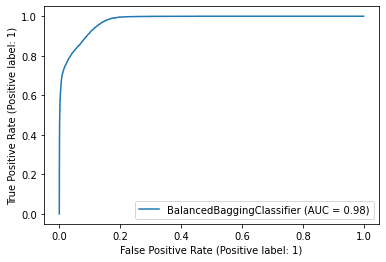

In [102]:
plot_roc_curve(bbc,X_test,y_test)

In [54]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [56]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, y_train) 
y_pred = brf.predict(X_test)
roc_auc_score(y_test,y_pred)

0.8825403058515942

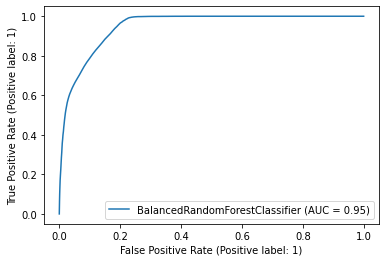

In [103]:
plot_roc_curve(brf,X_test,y_test)

In [57]:
from imblearn.ensemble import RUSBoostClassifier

In [58]:
rusboost = RUSBoostClassifier(n_estimators=200, algorithm='SAMME.R',\
                             random_state=0)
rusboost.fit(X_train, y_train) 
y_pred = rusboost.predict(X_test)
roc_auc_score(y_test,y_pred)

0.6426527030723662

In [66]:
from imblearn.ensemble import EasyEnsembleClassifier

In [67]:
eec = EasyEnsembleClassifier(random_state=0)
eec.fit(X_train, y_train) 
y_pred = eec.predict(X_test)
roc_auc_score(y_test,y_pred)

0.6227766783160522

# Submission Model

In [88]:
model_sub=BalancedBaggingClassifier(base_estimator=base_clf,\
                                 sampling_strategy='auto',\
                                 replacement=False,\
                                random_state=0)

In [89]:
model_sub.fit(xtrain,ytrain)

c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:40:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\aman\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:41:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


BalancedBaggingClassifier(base_estimator=XGBClassifier(base_score=None,
                                                       booster=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=1,
                                                       gamma=0.3, gpu_id=None,
                                                       importance_type='gain',
                                                       interaction_constraints=None,
                                                       learning_rate=0.2,
                                                       max_delta_step=None,
                                                       max_depth=12,
                                                       min_child_weight=7,
                                                       missing=nan,
                      

In [90]:
test_data.columns=xtrain.columns

In [97]:
submission=bbc.predict(test_data)

In [98]:
final_dict={'id':test_data.Id.values,'risk_flag':submission}

In [99]:
final_sub=pd.DataFrame(final_dict)

In [100]:
final_sub.to_csv('Submission_onlytrain_bxgc.csv',index=False)